In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['Flower_name'] = df.target.apply( lambda x: iris.target_names[x])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[df.target== 0]
df1 = df[df.target== 1]
df2 = df[df.target== 2]

In [9]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [11]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


Text(0, 0.5, 'sepal width (cm)')

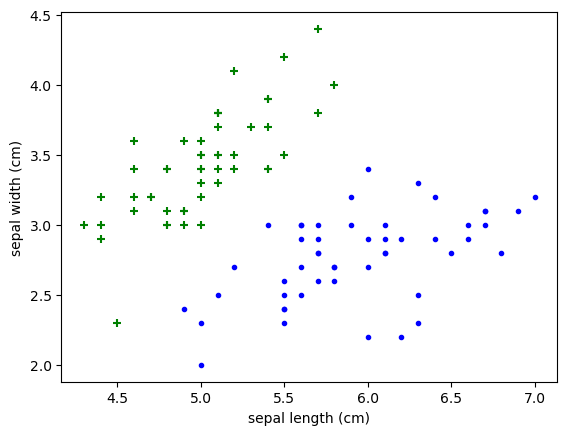

In [12]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'blue',marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

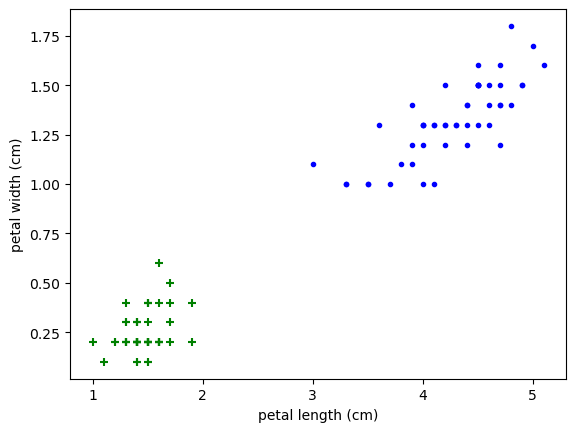

In [13]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'blue',marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.drop(['target','Flower_name'],axis = 1)

In [16]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y = df.target

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)

In [45]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',gamma='auto',C=30)

In [46]:
svc.fit(x_train,y_train)

SVC(C=30, gamma='auto')

In [47]:
svc.score(x_test,y_test)

0.9333333333333333

In [48]:
svc.score(x_train,y_train)


0.9904761904761905

In [49]:
y_pred = svc.predict(x_test)

In [50]:
target_names = iris.target_names.tolist()

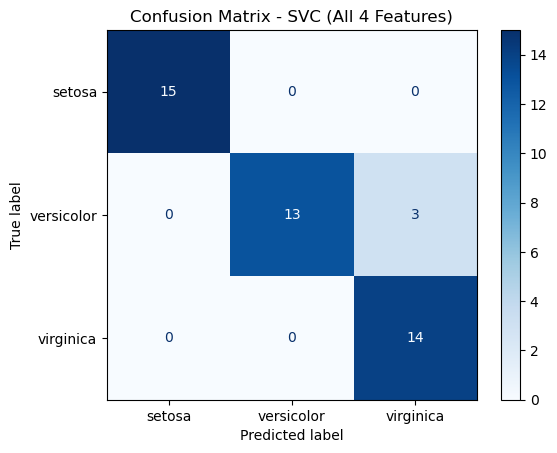

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# Plot
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVC (All 4 Features)')
plt.show()

## Cross Validation 

In [57]:
cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)

array([1.        , 1.        , 0.9       , 0.93333333, 1.        ])

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
kernels =['rbf','linear']
C = [1,10,20]
avg_scores = {}

for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data,iris.target,cv=5)
        avg_scores[kval+'_'+str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

In [59]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,10,20],'kernel' :['rbf','linear']},cv = 5,return_train_score= False)


In [60]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [61]:
clf.score(x_test,y_test)

0.9555555555555556

In [62]:
clf.cv_results_

{'mean_fit_time': array([0.00774083, 0.00400767, 0.00370846, 0.00435667, 0.0039114 ,
        0.00439553]),
 'std_fit_time': array([0.00320681, 0.00063658, 0.00040077, 0.00071741, 0.00049709,
        0.00080204]),
 'mean_score_time': array([0.00473242, 0.00279198, 0.00261021, 0.00267386, 0.00299973,
        0.00295005]),
 'std_score_time': array([7.84455755e-04, 3.91666959e-04, 4.91851854e-04, 4.21618488e-04,
        1.71528871e-06, 6.05632536e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [63]:
df3 = pd.DataFrame(clf.cv_results_)

In [64]:
df3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007741,0.003207,0.004732,0.000784,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,0.904762,0.980952,0.038095,6
1,0.004008,0.000637,0.002792,0.000392,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1
2,0.003708,0.000401,0.002610,0.000492,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1
3,0.004357,0.000717,0.002674,0.000422,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1
4,0.003911,0.000497,0.003000,0.000002,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000,1
5,0.004396,0.000802,0.002950,0.000606,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,0.952381,0.990476,0.019048,5


In [65]:
df3[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980952
1,1,linear,1.000000
2,10,rbf,1.000000
3,10,linear,1.000000
4,20,rbf,1.000000
5,20,linear,0.990476


In [66]:
clf.best_score_

1.0

In [67]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [68]:
clf.cv

5

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [70]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [71]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.960000,{'n_estimators': 1}
2,logistic_regression,0.966667,{'C': 5}
